<a href="https://colab.research.google.com/github/PedroDaim/CS_GO_Top10/blob/main/csgo_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Identifying Key Performance Indicators of Top Players and Teams in Professional CS:GO**




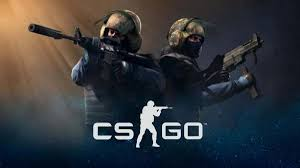


**Project Manifesto:**
This project analyzes publicly available data on professional CS:GO players and teams to identify the key performance indicators and strategic factors that differentiate top performers. The goal is to provide actionable insights into the drivers of success in competitive CS:GO, which could inform player development, team strategy, and talent acquisition.

---

**Business Problem/Question:**


To gain a competitive edge, understanding the critical elements that distinguish top-tier CS:GO players and teams is paramount. This project seeks to answer the question: What key performance indicators and strategic factors differentiate the most successful players and teams in CS:GO, and what actionable insights can be derived from this analysis?


# **Data Import**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
cs_players = pd.read_csv('/CS_GO_Top10_Analysis/Data_Main/player_stats.csv')
cs_teams = pd.read_csv('/CS_GO_Top10_Analysis/Data_Main/team_stats.csv')



FileNotFoundError: [Errno 2] No such file or directory: '/CS_GO_Top10_Analysis/Data_Main/player_stats.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Quick Exploratory Data Analysis (EDA)**

In [ ]:
# Display the head of the dataframe to confirm successful loading
cs_players.head(10)

,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
0,ZywOo,France,"['Vitality', 'aAa']",854,22399,5248,1.38,1.28
1,s1mple,Ukraine,"['Natus Vincere', 'FlipSid3']",1429,37717,8070,1.33,1.25
2,deko,Russia,['1WIN'],190,5096,1250,1.42,1.24
3,saffee,Brazil,['paiN'],202,5383,1211,1.37,1.24
4,sh1ro,Russia,"['Gambit', 'Gambit Youngsters']",744,19780,4593,1.43,1.22
5,m0NESY,Russia,['NAVI Junior'],144,3687,709,1.31,1.21
6,Kaze,Malaysia,"['ViCi', 'Flash', 'MVP.karnal']",784,20459,3900,1.32,1.20
7,degster,Russia,"['Spirit', 'Spirit', 'Espada']",555,14868,2745,1.31,1.19
8,sterling,New Zealand,"['AVANT', 'Dire Wolves', 'Grayhound', 'Legacy'...",702,18010,3532,1.33,1.19
9,d4v41,Malaysia,"['BOOT', 'FrostFire', 'Fire Dragoon', 'BOOT-d[...",308,8005,1358,1.27,1.18


In [ ]:
#Display the shape of the dataset(the number of rows and columns)
cs_players.shape

(1869, 8)

In [ ]:
#Display the first few rows of the dataframe cs_players
cs_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1869 entries, 0 to 1868
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1869 non-null   object 
 1   country       1869 non-null   object 
 2   teams         1869 non-null   object 
 3   total_maps    1869 non-null   int64  
 4   total_rounds  1869 non-null   int64  
 5   kd_diff       1869 non-null   int64  
 6   kd            1869 non-null   float64
 7   rating        1869 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 116.9+ KB


In [ ]:
#Describe summary statistics of numeric columns rounded to two decimals
cs_players.describe().round(2)

,total_maps,total_rounds,kd_diff,kd,rating
count,1869.00,1869.00,1869.00,1869.00,1869.00
mean,435.23,11399.08,180.25,1.00,0.99
std,391.29,10298.05,991.96,0.10,0.08
min,100.00,2348.00,-6238.00,0.63,0.68
25%,152.00,3977.00,-269.00,0.93,0.94
50%,271.00,7076.00,-32.00,0.99,0.99
75%,592.00,15532.00,352.00,1.06,1.03
max,2064.00,54137.00,8070.00,1.43,1.28


# **Data Cleaning**

In [ ]:
#Checking for null values
cs_players.isnull().sum()

,0
name,0
country,0
teams,0
total_maps,0
total_rounds,0
kd_diff,0
kd,0
rating,0


In [ ]:
# Count duplicates
cs_players.duplicated().sum()

np.int64(0)

In [ ]:
corr_num = cs_players[['total_maps', 'total_rounds', 'kd_diff', 'rating', 'kd']]
correlation = corr_num.corr()
correlation

,total_maps,total_rounds,kd_diff,rating,kd
total_maps,1.000000,0.999800,0.443814,0.303886,0.331059
total_rounds,0.999800,1.000000,0.442883,0.303443,0.330561
kd_diff,0.443814,0.442883,1.000000,0.732967,0.760398
rating,0.303886,0.303443,0.732967,1.000000,0.981647
kd,0.331059,0.330561,0.760398,0.981647,1.000000


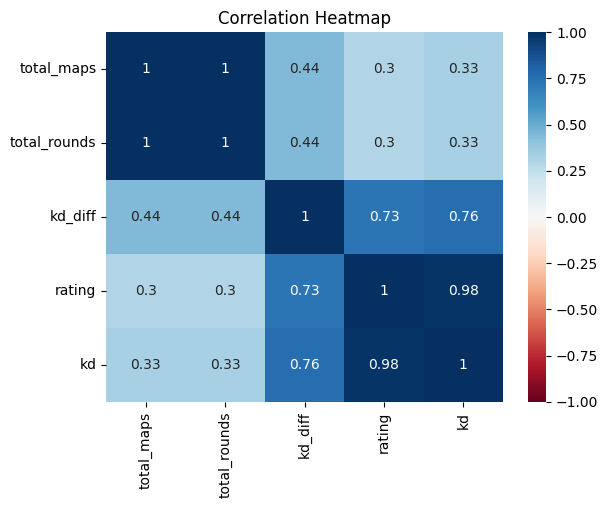

In [ ]:
sns.heatmap(correlation, annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

**Since there are no missing values or duplicates, there
 is need to use the folowing methods:**


*   df.dropna() to drop rows with null values.
*   df.fillna() to fill null values with a chosen variable.
*   df.drop-_duplicates() to drop duplicate rows.






In [ ]:
average_kd_all = cs_players['kd'].mean()
print(f"Average KD ratio of all players: {average_kd_all:.2f}")